In [195]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import math

In [196]:
game_stats = pd.read_csv('../csv/game_stats.csv')
game_stats["totalGoals"] = game_stats["home_goals"] + game_stats["away_goals"]
game_stats = game_stats[game_stats["totalGoals"] < 10]  # remove outliers 99% of games will be kept
del game_stats["Unnamed: 0"]
del game_stats["home_goals"]
del game_stats["away_goals"]
del game_stats["home_powerPlayGoals"]
del game_stats["away_powerPlayGoals"]
del game_stats["home_powerPlayOpportunities"]
del game_stats["away_powerPlayOpportunities"]

game_stats = game_stats.drop_duplicates()
game_stats = game_stats.dropna()

game_stats

,home_pim,home_shots,home_powerPlayPercentage,home_faceOffWinPercentage,home_blocked,home_takeaways,home_giveaways,home_hits,away_pim,away_shots,away_powerPlayPercentage,away_faceOffWinPercentage,away_blocked,away_takeaways,away_giveaways,away_hits,totalGoals
2,10,29,0.0,68.2,17,5,2,23,12,15,33.3,31.8,8,6,4,23,6
5,10,27,0.0,51.6,13,8,16,45,4,40,40.0,48.4,4,3,9,22,4
9,4,41,50.0,41.4,18,4,10,24,4,15,50.0,58.6,11,4,9,13,7
10,2,46,50.0,45.6,9,8,12,29,6,39,0.0,54.4,13,6,6,20,7
11,2,24,66.7,57.1,7,3,19,23,6,34,0.0,42.9,15,9,9,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21383,4,32,0.0,52.6,15,5,9,29,8,19,0.0,47.4,23,6,7,33,4
21384,4,23,0.0,43.9,23,14,19,20,6,24,50.0,56.1,17,8,7,13,3
21386,9,32,0.0,63.6,13,4,12,27,9,37,0.0,36.4,17,7,10,27,7
21390,4,37,75.0,49.0,6,3,11,9,8,21,0.0,51.0,10,3,2,17,5


### Partition Training & Testing Data

In [197]:
col_names = [col for col in game_stats.columns]


originalGoals = game_stats["totalGoals"]

# z = (x-mean)/std
# x = (z*std)+mean

original_mean = game_stats.mean()
original_std = game_stats.std()

# game_stats_normalized =(game_stats-original_mean)/original_std
# game_stats = game_stats_normalized
# game_stats["totalGoals"] = originalGoals

features = np.array(game_stats.loc[:, game_stats.columns != 'totalGoals'],  dtype='float32')

# add bias column to features
features = np.insert(features, 0, 1, axis=1)


targets = np.array(game_stats['totalGoals'], dtype='float32')


x_train = features[:int(features.shape[0] * 0.9)]
t_train = targets[:int(targets.shape[0] * 0.9)]

x_test = features[int(features.shape[0] * 0.9):]
t_test = targets[int(targets.shape[0] * 0.9):]

game_stats

,home_pim,home_shots,home_powerPlayPercentage,home_faceOffWinPercentage,home_blocked,home_takeaways,home_giveaways,home_hits,away_pim,away_shots,away_powerPlayPercentage,away_faceOffWinPercentage,away_blocked,away_takeaways,away_giveaways,away_hits,totalGoals
2,10,29,0.0,68.2,17,5,2,23,12,15,33.3,31.8,8,6,4,23,6
5,10,27,0.0,51.6,13,8,16,45,4,40,40.0,48.4,4,3,9,22,4
9,4,41,50.0,41.4,18,4,10,24,4,15,50.0,58.6,11,4,9,13,7
10,2,46,50.0,45.6,9,8,12,29,6,39,0.0,54.4,13,6,6,20,7
11,2,24,66.7,57.1,7,3,19,23,6,34,0.0,42.9,15,9,9,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21383,4,32,0.0,52.6,15,5,9,29,8,19,0.0,47.4,23,6,7,33,4
21384,4,23,0.0,43.9,23,14,19,20,6,24,50.0,56.1,17,8,7,13,3
21386,9,32,0.0,63.6,13,4,12,27,9,37,0.0,36.4,17,7,10,27,7
21390,4,37,75.0,49.0,6,3,11,9,8,21,0.0,51.0,10,3,2,17,5


In [198]:
features.shape

(12459, 17)

### Define Closed Form Linear Regression

In [199]:
def cf_lin_reg(X : np.array, t : np.array) -> np.array:
    '''
    cf_lin_reg:
        - Closed form solution for linear regression

    Params:
        - X: numpy array of features w/ shape (d, M)
        - t: numpy array of targets w/ shape (d, 1)
        
    Returns:
        - w_hat: numpy array of optimal weights w/ shape (M, 1)
    '''
    X_trans = X.transpose()
    w_hat = inv(X_trans.dot(X)).dot(X_trans).dot(t)
    return w_hat

### Compute optimal weights for training data

In [200]:
w_hat = cf_lin_reg(x_train, t_train)
w_hat

array([ 3.6414149 ,  0.01092492,  0.0344487 ,  0.02041046, -0.00741694,
       -0.01613406,  0.00639718,  0.00368401, -0.0080036 ,  0.01458359,
        0.03601862,  0.01962176, -0.00692485, -0.02878509,  0.01458864,
        0.01077772, -0.00566552], dtype=float32)

### Define Prediction

In [201]:
def predict(X : np.array, w : np.array) -> np.array:
    '''
    predict:
        - Predicts targets using given weights

    Params:
        - X: numpy array of features w/ shape (d, M)
        - w: numpy array of weights w/ shape (M, 1)
        
    Returns:
        - t_hat: numpy array of predicted targets w/ shape (d, 1)
    '''
    t_hat = X.dot(w)
    return t_hat

### Make predictions (t_hat), plot both predictions and true targets

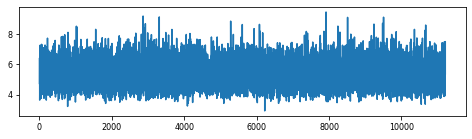

In [202]:
t_hat = predict(x_train, w_hat)

# denormalize
# t_hat = [(ti * original_std["totalGoals"]) + original_mean["totalGoals"] for ti in t_hat]
# targets = [(ti * original_std["totalGoals"]) + original_mean["totalGoals"] for ti in targets]
# t_train = [(ti * original_std["totalGoals"]) + original_mean["totalGoals"] for ti in t_train]


plt.rcParams["figure.figsize"] = (8, 2)
plt.plot(t_hat)

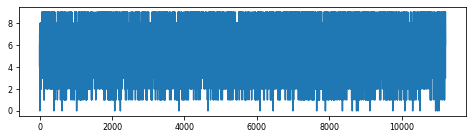

In [203]:
plt.plot(t_train)

### Plot prediction and true target distributions

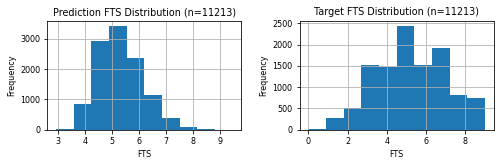

In [204]:
pred_and_targets_df = pd.DataFrame({f'Prediction FTS Distribution (n={len(t_train)})': t_hat, f'Target FTS Distribution (n={len(t_train)})': t_train})
plt.rcParams["font.size"] = 8
s = pred_and_targets_df.hist()
for ax in s.flatten():
    ax.set_xlabel("FTS")
    ax.set_ylabel("Frequency")

In [205]:
print(f"MSE: {np.mean((t_hat - t_train)**2)}")
print(f"RMSE: {np.sqrt(np.mean((t_hat - t_train)**2))}")
print(f"Prediction Mean: {np.mean(t_hat)}")
print(f"Target Mean: {np.mean(t_train)}")
print(f"Prediction Std: {np.std(t_hat)}")
print(f"Target Std: {np.std(t_train)}")

MSE: 3.2855224609375
RMSE: 1.8126009702682495
Prediction Mean: 5.307880878448486
Target Mean: 5.307767868041992
Prediction Std: 0.8266466856002808
Target Std: 1.992201328277588


In [206]:
# t-test between t_hat and t_train
from scipy import stats

t_stat, p_value = stats.ttest_rel(t_hat, t_train)
print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: 0.006619510745825149
p-value: 0.9947185509151466


### Analyze 'Training' Loss of Closed Form Solution

In [207]:
def avg_loss(X : np.array, t : np.array, w : np.array) -> float:
    '''
    avg_loss:
        - Average loss of predictions

    Params:
        - X: numpy array of features w/ shape (d, M)
        - t: numpy array of targets w/ shape (d, 1)
        - w: numpy array of weights w/ shape (M, 1)
        
    Returns:
        - avg_loss: float
    '''
    t_hat = predict(X, w)
    
    losses = [(pred - target) ** 2 for pred, target in zip(t_hat, t)]
    avg_loss = np.sum(losses) / len(losses)
    
    return losses, avg_loss

In [208]:
losses, average_loss = avg_loss(x_train, t_train, w_hat)
abs_losses = [math.sqrt(loss) for loss in losses]
min_loss = min(losses)
max_loss = max(losses)

print("------- Squared Error Loss -------")
print(f"Average loss: {average_loss}")
print(f"Min loss: {min_loss}")
print(f"Max loss: {max_loss}\n")

print("------- Absolute Error -------")
print(f"Average loss: {math.sqrt(average_loss)}")
print(f"Min loss: {math.sqrt(min_loss)}")
print(f"Max loss: {math.sqrt(max_loss)}")

------- Squared Error Loss -------
Average loss: 3.285522476374441
Min loss: 2.7853275241795927e-08
Max loss: 32.43815418741747

------- Absolute Error -------
Average loss: 1.8126010251498925
Min loss: 0.00016689300537109375
Max loss: 5.695450305938721


### Absolute Loss Distribution of 'Training' loss

<AxesSubplot:title={'center':'Absolute Error Distribution'}>

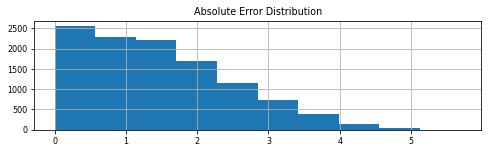

In [209]:
losses_df = pd.DataFrame()
losses_df["loss"] = abs_losses
plt.title("Absolute Error Distribution")
losses_df["loss"].hist()

### Explore Performance on Unseen Data

In [210]:
losses, average_loss = avg_loss(x_test, t_test, w_hat)
abs_losses = [math.sqrt(loss) for loss in losses]
min_loss = min(losses)
max_loss = max(losses)

print("------- Squared Error Loss -------")
print(f"Average loss: {average_loss}")
print(f"Min loss: {min_loss}")
print(f"Max loss: {max_loss}\n")

print("------- Absolute Error -------")
print(f"Average loss: {math.sqrt(average_loss)}")
print(f"Min loss: {math.sqrt(min_loss)}")
print(f"Max loss: {math.sqrt(max_loss)}")

------- Squared Error Loss -------
Average loss: 3.1850357568548695
Min loss: 2.091630676659406e-06
Max loss: 30.41147886882777

------- Absolute Error -------
Average loss: 1.7846668475810463
Min loss: 0.0014462471008300781
Max loss: 5.514660358428955


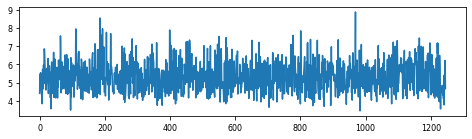

In [211]:
t_hat = predict(x_test, w_hat)
plt.plot(t_hat)

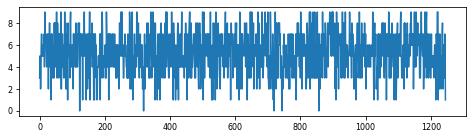

In [212]:
plt.plot(t_test)

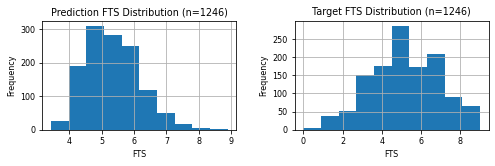

In [221]:
# denormalize t_hat and t_test
# t_hat = [(ti * original_std["totalGoals"]) + original_mean["totalGoals"] for ti in t_hat]
# t_test = [(ti * original_std["totalGoals"]) + original_mean["totalGoals"] for ti in t_test]

pred_and_targets_df = pd.DataFrame({f'Prediction FTS Distribution (n={len(t_hat)})': t_hat, f'Target FTS Distribution (n={len(t_hat)})': t_test})
s = pred_and_targets_df.hist()
for ax in s.flatten():
    ax.set_xlabel("FTS")
    ax.set_ylabel("Frequency")


<AxesSubplot:title={'center':'Absolute Error Distribution (n=1246)'}, xlabel='Absolute Error (Goals)', ylabel='Frequency'>

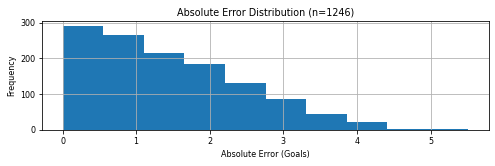

In [218]:
losses_df = pd.DataFrame()
losses_df["loss"] = abs_losses
plt.title(f"Absolute Error Distribution (n={len(t_test)})")
plt.xlabel("Absolute Error (Goals)")
plt.ylabel("Frequency")
losses_df["loss"].hist()


In [220]:
print(f"MSE: {np.mean((t_hat - t_test)**2)}")
print(f"RMSE: {np.sqrt(np.mean((t_hat - t_test)**2))}")
print(f"Prediction Mean: {np.mean(t_hat)}")
print(f"Target Mean: {np.mean(t_test)}")
print(f"Prediction Std: {np.std(t_hat)}")
print(f"Target Std: {np.std(t_test)}")

MSE: 3.1850357055664062
RMSE: 1.7846667766571045
Prediction Mean: 5.325050354003906
Target Mean: 5.252006530761719
Prediction Std: 0.8186290860176086
Target Std: 1.9584099054336548
